## Moduls to install 

In [1]:
# !pip install ipympl
# !pip install wget
# !pip install mitosheet
# !pip install pyjanitor
# !pip install pandas

## Import utilsLaris from github

In [1]:
import os
import wget
if os.path.isfile("utilsLaris.py")==True:
    os. remove("utilsLaris.py")
wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/utilsLaris.py")

'utilsLaris.py'

# Import useful packages

In [2]:
import janitor
import os
import glob
import mitosheet
import ipywidgets as widgets
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import utilsLaris
os.environ['NUMEXPR_MAX_THREADS'] = '16'
##############Initialisation parametres#########"
period = "5T"
prefixFiles = {"ElecS219" :"S219*.csv","ElecS114" :"S114*.csv", "Weather" :"WeatherFile*.txt"}
dirctory="./Data"
shelly_219 =  ['sensor_AA7BF5','sensor_AA4706', 'sensor_AA9130', 'sensor_483FDA81E0F4']
shelly_114 = ['sensor_AAC16E','sensor_AA7DBF' ,'sensor_AA8369']

# Ambiance data Importation

In [3]:
#utilsLaris.importData()

# Weather data

In [4]:
##  Merge multiple CSV Files into a single Pandas dataframe
################################################################################################################
# merging the files
########################################################wgetwget########################################################
# Data préparation for weatherData
################################################################################################################""
# use dayfirst = True to have correct date
weatherData = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["Weather"])
weatherData = utilsLaris.dataPreparationWeather(weatherData)

In [5]:
weatherData

,weather_out,weather_hum,weather_bar_,weather_rad_
date,,,,
2022-02-03 14:00:00,6.1,91.0,1019.700000,91.000000
2022-02-03 14:05:00,6.1,91.0,1019.683333,85.833333
2022-02-03 14:10:00,6.1,91.0,1019.666667,80.666667
2022-02-03 14:15:00,6.1,91.0,1019.650000,75.500000
2022-02-03 14:20:00,6.1,91.0,1019.633333,70.333333
...,...,...,...,...
2022-04-25 09:30:00,10.9,91.0,1012.100000,91.000000
2022-04-25 09:35:00,10.9,92.0,1012.100000,94.000000
2022-04-25 09:40:00,10.8,91.0,1012.000000,97.000000


# Electric data

In [6]:
# merge all files csv and do data préparation 
elecData_219 = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["ElecS219"])
elecData_114 = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["ElecS114"])
elecData_219 = utilsLaris.dataPreparationElec(elecData_219, period = period)
elecData_114 = utilsLaris.dataPreparationElec(elecData_114, period = period)

In [7]:
elecData_114

,elec_prises_114_w,elec_general_114_w,elec_eclairage_114_w,elec_videoproj_114_w
date,,,,
2022-02-01 10:45:00,0.0,712.3775,704.7725,171.4225
2022-02-01 10:50:00,0.0,782.6500,759.8160,176.1260
2022-02-01 10:55:00,0.0,782.6620,760.1980,168.9560
2022-02-01 11:00:00,0.0,717.0460,702.1660,108.5720
2022-02-01 11:05:00,0.0,706.7520,688.9680,99.4840
...,...,...,...,...
2022-04-25 08:35:00,0.0,0.0000,0.0000,0.0000
2022-04-25 08:40:00,0.0,0.0000,0.0000,0.0000
2022-04-25 08:45:00,0.0,0.0000,0.0000,0.0000


## Read data : Ambiance and windows

In [8]:
tab = utilsLaris.readData(period)
ResampledDict_s114 = tab[0]
ResampledDict_s219 = tab[1]
ResampledDict_shelly = tab[2]
ambianceData_114 = utilsLaris.dataFusionAmbiance(ResampledDict_s114, salle = 114)
ambianceData_219 = utilsLaris.dataFusionAmbiance(ResampledDict_s219, salle = 219)

# Data Fusion : All

In [9]:
dfs_219 = [ambianceData_219,elecData_219,weatherData]
dfs_114 = [ambianceData_114,elecData_114,weatherData]
df_219 = utilsLaris.dataFusionAll(dfs=dfs_219, shelly_sensors=shelly_219,ResampledDict_shelly=ResampledDict_shelly)
df_114 = utilsLaris.dataFusionAll(dfs=dfs_114, shelly_sensors=shelly_114,ResampledDict_shelly=ResampledDict_shelly)


<AxesSubplot:xlabel='date'>

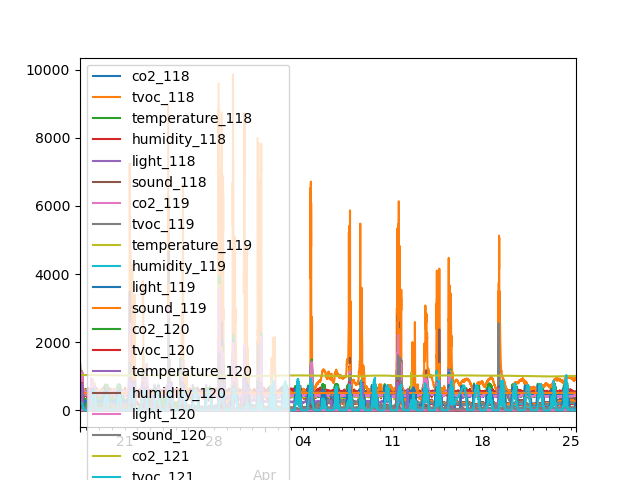

In [10]:
df_114.plot()

In [ ]:
shelly_114

In [ ]:
df_114.columns

In [ ]:
#ax = df1.iloc[100:2000,:].plot(figsize=(15, 6))
dataMaster = df_114.copy()
colonnesNames = utilsLaris.seperateGrandeurs(dataMaster, grandeurs=["temperature","co2","humidity","sound","tvoc", "light",  "elec","state"])
colonnesNames

In [ ]:
list(colonnesNames.keys())

In [ ]:
colonnesName = colonnesNames['elec']
print(colonnesName)
ax = dataMaster.loc[:,colonnesName].iloc[100:,:].plot(figsize=(12, 5)) 
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.legend(loc='lower left')
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
colonnesNames
targets = ["co2", "temperature"]
resutilsLarist = [colonnesNames[key] for key in colonnesNames.keys() if key in targets]

In [ ]:
resutilsLarist

In [ ]:
from sklearn.ensemble import IsolationForest
X =x.iloc[:,0:]

clf = IsolationForest(random_state=0).fit(X)
y=clf.predict(X)

# Detect outliersset_index

In [ ]:
filt_df= df_114.copy()
low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)


## deal with outliers?

In [ ]:
raw_data.drop(outliers, inplace = True)
print(len(raw_data))


In [ ]:
raw_data.drop(['id'], axis=1).head()

# Analyse measured data

In [ ]:
corr = df_114.corr()
corr
raw_data=df_114.copy()

sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

In [ ]:
# Verif bonne prise en compte des dates
i_value = "temperature"
fig, ax = plt.subplots(figsize=(20,10))
df1 = pd.Series(sensor_100[i_value+'_100'])[0:5000]
df2 = pd.Series(sensor_101[i_value+'_101'])[5000:10000]

ax1 = df1.plot(grid=True, label='100')
ax2 = df2.plot(grid=True, label='101')

plt.ylabel((i_value+" "+units[i]), fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(i_value, fontsize=16)
    
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
plt.legend(loc="upper left")

plt.show()

In [ ]:
print(sensor_100.shape, sensor_101.shape)

In [ ]:
sensor_103.id

In [ ]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_100.copy()
sensor_100_ = sensor_100.copy()
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2_100.isnutilsLarisl().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2_100.isnutilsLarisl().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

In [ ]:
sensor_100_

In [ ]:
sensor_100_['2022-03-02'].co2.plot()

In [ ]:
import ipywidgets as widgets
%matplotlib widget
sensor_100_.loc['2022-02', 'co2'].resample('D').plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

sensor_100_.loc['2022-03-02 11':'2022-03-02 15', 'co2'].resample('1.33H').plot()
plt.show()

In [ ]:
sensor_100.sort_index(inplace=True)
y=sensor_100.index
ydif=y[1:]-y[:-1]
ydif.min()

In [ ]:
ydif.max()
hawks = sensor_100_

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=hawks.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    mutilsLaristiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:

ydif=y[1:]-y[:-1]
ydif.min()

In [ ]:
ydif.max()

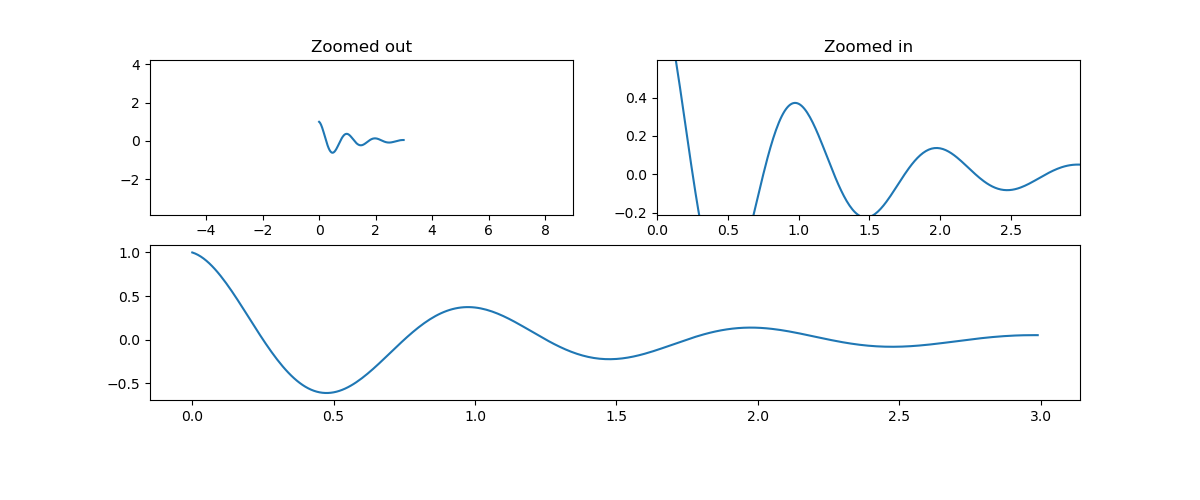

In [40]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # DefautilsLarist margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [ ]:
# Importing
import sklearn
import pandas as pd 
# Load the dataset
bos_hou = raw_data.copy() 
# Create the dataframe
column_name = bos_hou.columns
df_boston = bos_hou
df_boston.columns = column_name
print(df_boston.head())
 
''' Detection '''
# IQR
Q1 = np.percentile(df_boston['co2'], 5,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['co2'], 95,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper = np.where(df_boston['co2'] >= (Q3+5*IQR))
# Lower bound
lower = np.where(df_boston['co2'] <= (Q1-2*IQR))
 
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

In [ ]:
df_boston.max()

In [ ]:
#!pip list

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(ambianceData_219)

X_test = ambianceData_219
# the model learns that the second feature is double the first
a = np.round(imp.transform(X_test))